### Phase 1: Data Understanding & Exploration
#### Step 1.1: Data Loading and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('covid_tweets/Corona_NLP_train.csv', encoding='ISO-8859-1')

# Initial exploration with Advanced Python techniques
print("=== DATASET SHAPE AND INFO ===")
print(f"Dataset shape: {df.shape}")

print("\n=== COLUMN DATA TYPES ===")
print(df.dtypes)

print("\n=== FIRST FEW ROWS ===")
print(df.head())

print("\n=== SENTIMENT DISTRIBUTION ===")
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

# Advanced Python: Dictionary comprehension for quick stats
stats = {
    'total_tweets': len(df),
    'unique_sentiments': df['Sentiment'].nunique(),
    'missing_tweets': df['OriginalTweet'].isnull().sum(),
    'missing_sentiments': df['Sentiment'].isnull().sum()
}
print("\n=== DATASET STATISTICS ===")
for key, value in stats.items():
    print(f"{key}: {value}")

=== DATASET SHAPE AND INFO ===
Dataset shape: (41157, 6)

=== COLUMN DATA TYPES ===
UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

=== FIRST FEW ROWS ===
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extr

#### Step 1.2: Data Visualization & Statistical Analysis

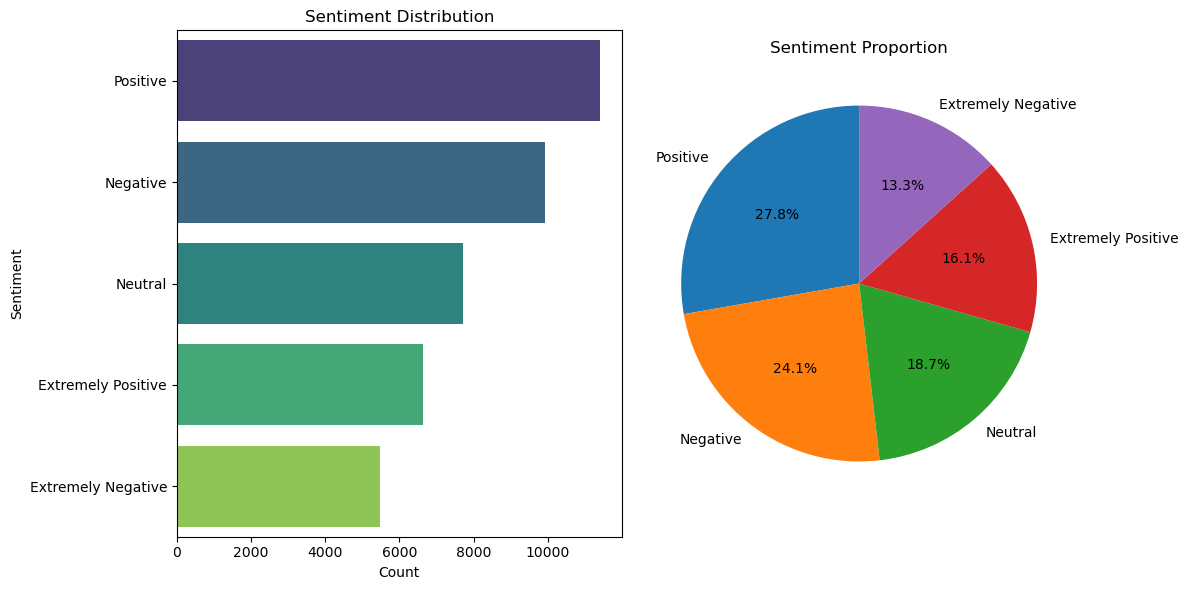


=== TWEET LENGTH STATISTICS ===
mean_length: 204.20
std_dev: 68.66
min_length: 11.00
max_length: 355.00

Number of length outliers (Z-score > 3): 0


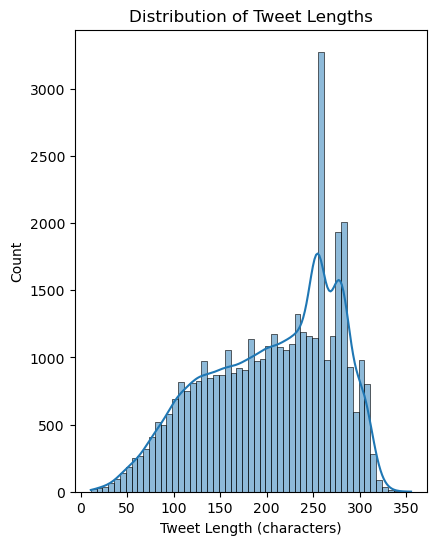

In [2]:
# Data visualiseren (A) - Sentiment distribution
plt.figure(figsize=(12, 6))

# Plot 1: Bar chart of sentiment distribution
plt.subplot(1, 2, 1)
sns.barplot(x=sentiment_counts.values, y=sentiment_counts.index, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Count')

# Plot 2: Pie chart
plt.subplot(1, 2, 2)
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Proportion')

plt.tight_layout()
plt.show()

# Normaalverdeling (T) analysis - Tweet length distribution
df['tweet_length'] = df['OriginalTweet'].str.len()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['tweet_length'], kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (characters)')

# Standaardafwijking (T) calculation
length_stats = {
    'mean_length': df['tweet_length'].mean(),
    'std_dev': df['tweet_length'].std(),  # Standaardafwijking
    'min_length': df['tweet_length'].min(),
    'max_length': df['tweet_length'].max()
}

print("\n=== TWEET LENGTH STATISTICS ===")
for stat, value in length_stats.items():
    print(f"{stat}: {value:.2f}")

# Z-scores (T) for outlier detection
df['length_zscore'] = (df['tweet_length'] - length_stats['mean_length']) / length_stats['std_dev']
outliers = df[abs(df['length_zscore']) > 3]
print(f"\nNumber of length outliers (Z-score > 3): {len(outliers)}")

Here we're applying:

    -Data visualiseren (A) with matplotlib and seaborn

    -Normaalverdeling (T) analysis using histogram with KDE

    -Standaardafwijking (T) to understand tweet length variability

    -Z-scores (T) to identify potential outliers

### Phase 2: Text Data Preparation & Feature Engineering
#### Step 2.1: Text Preprocessing and Cleaning

In [4]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')
    
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
    
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    """
    Comprehensive tweet cleaning using Advanced Python (T)
    """
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove mentions and hashtags
    tweet = re.sub(r'@\w+|#\w+', '', tweet)
    # Remove punctuation and numbers
    tweet = tweet.translate(str.maketrans('', '', string.punctuation + string.digits))
    # Convert to lowercase and remove extra whitespace
    tweet = tweet.lower().strip()
    # Tokenize and remove stopwords
    tokens = word_tokenize(tweet)
    # Lemmatization and stopword removal
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    
    return ' '.join(tokens)

# Apply cleaning to the dataset
print("Cleaning tweets...")
df['cleaned_tweet'] = df['OriginalTweet'].apply(clean_tweet)

# Show before and after examples
print("\n=== TEXT CLEANING EXAMPLES ===")
for i in range(3):
    print(f"Original: {df['OriginalTweet'].iloc[i][:100]}...")
    print(f"Cleaned: {df['cleaned_tweet'].iloc[i][:100]}...")
    print("-" * 50)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bernw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bernw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaning tweets...

=== TEXT CLEANING EXAMPLES ===
Original: @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co...
Cleaned: ...
--------------------------------------------------
Original: advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbe...
Cleaned: advice talk neighbour family exchange phone number create contact list phone number neighbour school...
--------------------------------------------------
Original: Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 o...
Cleaned: coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid outbreak...
--------------------------------------------------


This code demonstrates Advanced Python (T) with:

    List comprehensions for efficient text processing

    Regular expressions for pattern matching

    String methods and translation tables

    Function application with apply()

### Step 2.2: Feature Extraction with TF-IDF

In [5]:
# TF-IDF Vectorization - Matrixvermenigvuldigen (T) foundation
print("Creating TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,      # Limit vocabulary size
    min_df=5,               # Ignore terms that appear in less than 5 documents
    max_df=0.7,             # Ignore terms that appear in more than 70% of documents
    ngram_range=(1, 2)      # Include unigrams and bigrams
)

# Transform text to TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_tweet'])
y = df['Sentiment']

print(f"TF-IDF matrix shape: {X_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")

# Demonstrate the sparse matrix structure
print("\n=== TF-IDF MATRIX PROPERTIES ===")
print(f"Data type: {type(X_tfidf)}")
print(f"Number of non-zero elements: {X_tfidf.nnz}")
print(f"Sparsity: {100 * (1 - X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1])):.2f}%")

Creating TF-IDF features...
TF-IDF matrix shape: (41157, 5000)
Vocabulary size: 5000

=== TF-IDF MATRIX PROPERTIES ===
Data type: <class 'scipy.sparse._csr.csr_matrix'>
Number of non-zero elements: 606180
Sparsity: 99.71%


Here we're creating a feature matrix where:

    Each row represents a tweet

    Each column represents a word/n-gram from our vocabulary

    The values are TF-IDF scores representing word importance

    This creates the foundation for Matrixvermenigvuldigen (T) in our models

#### Step 2.3: Dimensionality Reduction with PCA

Applying PCA for dimensionality reduction...
PCA reduced shape: (41157, 50)
Explained variance ratio: 0.0352


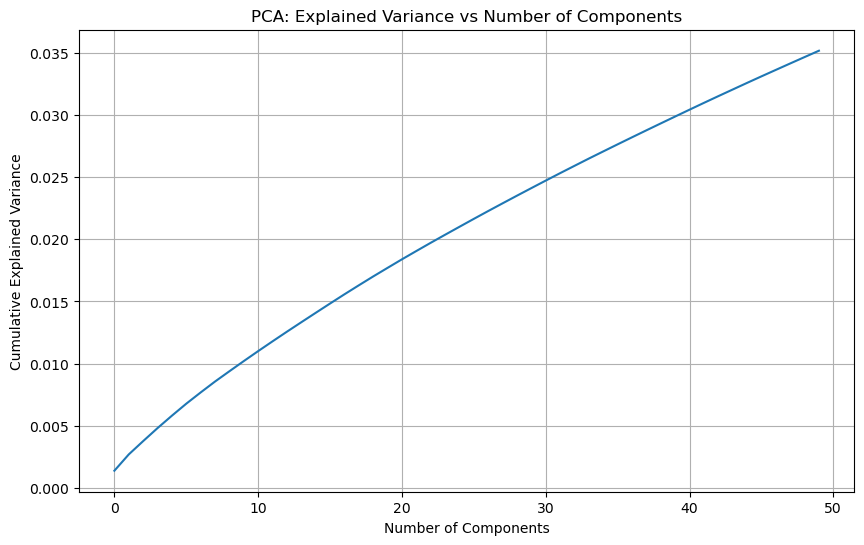

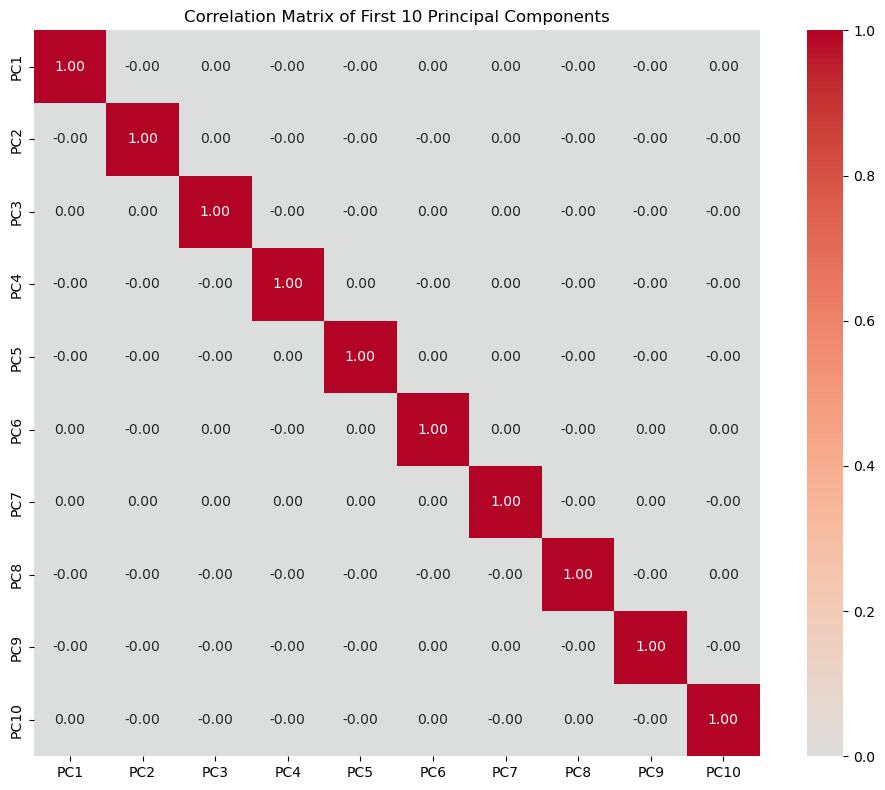

In [6]:
# Convert sparse matrix to dense for PCA (for demonstration)
X_dense = X_tfidf.toarray()

# Normaliseren (T) - Standardize the features before PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrix compatibility
X_normalized = scaler.fit_transform(X_dense)

print("Applying PCA for dimensionality reduction...")
# PCA (T) for visualization and dimensionality reduction
pca = PCA(n_components=50)  # Reduce to 50 components
X_pca = pca.fit_transform(X_normalized)

print(f"PCA reduced shape: {X_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}")

# Visualize cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Correlatiematrix (A) for the first 10 principal components
import pandas as pd

# Create correlation matrix for first 10 components
pca_df = pd.DataFrame(X_pca[:, :10], columns=[f'PC{i+1}' for i in range(10)])
correlation_matrix = pca_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix of First 10 Principal Components')
plt.tight_layout()
plt.show()

 We're applying:

    PCA (T) to reduce dimensionality while preserving variance

    Normaliseren (T) using StandardScaler (Z-score normalization)

    Correlatiematrix (A) to understand relationships between principal components

#### Step 2.4: Statistical Analysis and Feature Selection

In [7]:
from sklearn.feature_selection import f_classif
from scipy import stats

# ANOVA (T) for feature selection - identify most important words per sentiment
def top_features_by_sentiment(X, y, feature_names, n_features=10):
    """
    Use ANOVA to find top features for each sentiment class
    """
    unique_sentiments = y.unique()
    top_features = {}
    
    for sentiment in unique_sentiments:
        # Create binary target for this sentiment vs all others
        y_binary = (y == sentiment).astype(int)
        
        # ANOVA F-test
        f_scores, p_values = f_classif(X, y_binary)
        
        # Get top features
        top_indices = np.argsort(f_scores)[-n_features:][::-1]
        top_features[sentiment] = [(feature_names[i], f_scores[i], p_values[i]) 
                                 for i in top_indices]
    
    return top_features

# Get feature names from TF-IDF
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Get top features for each sentiment
print("Performing ANOVA feature analysis...")
top_features = top_features_by_sentiment(X_tfidf, y, feature_names, n_features=5)

print("\n=== TOP FEATURES BY SENTIMENT (ANOVA) ===")
for sentiment, features in top_features.items():
    print(f"\n{sentiment}:")
    for feature, f_score, p_value in features:
        print(f"  {feature}: F-score={f_score:.2f}, p-value={p_value:.4f}")

# T-toets (A) example: Compare tweet lengths between positive and negative sentiments
positive_tweets = df[df['Sentiment'] == 'Positive']['tweet_length']
negative_tweets = df[df['Sentiment'] == 'Negative']['tweet_length']

t_stat, p_value = stats.ttest_ind(positive_tweets, negative_tweets, equal_var=False)
print(f"\n=== T-TEST RESULTS: POSITIVE vs NEGATIVE TWEET LENGTHS ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean positive tweet length: {positive_tweets.mean():.2f}")
print(f"Mean negative tweet length: {negative_tweets.mean():.2f}")

if p_value < 0.05:
    print("Result: Statistically significant difference in tweet lengths")
else:
    print("Result: No significant difference in tweet lengths")

Performing ANOVA feature analysis...

=== TOP FEATURES BY SENTIMENT (ANOVA) ===

Neutral:
  panic: F-score=404.85, p-value=0.0000
  like: F-score=355.33, p-value=0.0000
  demand: F-score=341.57, p-value=0.0000
  help: F-score=295.64, p-value=0.0000
  hand: F-score=258.63, p-value=0.0000

Positive:
  panic: F-score=318.99, p-value=0.0000
  hand sanitizer: F-score=219.58, p-value=0.0000
  crisis: F-score=204.01, p-value=0.0000
  like: F-score=203.92, p-value=0.0000
  hand: F-score=199.76, p-value=0.0000

Extremely Negative:
  panic: F-score=2076.82, p-value=0.0000
  crisis: F-score=2066.99, p-value=0.0000
  panic buying: F-score=999.36, p-value=0.0000
  buying: F-score=732.51, p-value=0.0000
  scam: F-score=610.19, p-value=0.0000

Negative:
  demand: F-score=349.09, p-value=0.0000
  hand: F-score=235.32, p-value=0.0000
  hand sanitizer: F-score=206.54, p-value=0.0000
  panic: F-score=187.57, p-value=0.0000
  price: F-score=174.69, p-value=0.0000

Extremely Positive:
  help: F-score=1191.

 This section applies:

    ANOVA (T) to identify words that best distinguish between sentiment classes

    T-toets (A) to test for statistical differences between groups

    Bias en betrouwbaarheid (T) consideration through rigorous statistical testing

#### Step 2.5: Data Splitting and Preparation for Modeling

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Label encoding mapping:")
for i, sentiment in enumerate(label_encoder.classes_):
    print(f"  {sentiment} -> {i}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

X_train_dense, X_test_dense, y_train_dense, y_test_dense = train_test_split(
    X_pca, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\n=== DATA SPLITS ===")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {len(np.unique(y_encoded))}")

Label encoding mapping:
  Extremely Negative -> 0
  Extremely Positive -> 1
  Negative -> 2
  Neutral -> 3
  Positive -> 4

=== DATA SPLITS ===
Training set: 32925 samples
Test set: 8232 samples
Number of features: 5000
Number of classes: 5


### Phase 3: Model Development & Training
#### Step 3.1: Implementing Multiple Classification Algorithms

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Dictionary to store model results
model_results = {}

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Comprehensive model evaluation function
    """
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    training_time = time.time() - start_time
    
    # Store results
    model_results[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'training_time': training_time
    }
    
    print(f"\n=== {model_name.upper()} RESULTS ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {training_time:.2f} seconds")
    
    return model, y_pred

# 1. Logistic Regression (A) - with mathematical foundation explanation
print("=" * 60)
print("1. LOGISTIC REGRESSION IMPLEMENTATION")
print("=" * 60)

print("\nMathematical Foundation:")
print("• Matrixvermenigvuldigen (T): z = Xw + b")
print("• Sigmoid activation: σ(z) = 1 / (1 + e^(-z))")
print("• Cross Entropy (T) loss: L = -Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]")
print("• Gradient descent (A) for weight updates")

lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs'
)
lr_model, lr_pred = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression")

# 2. Naive Bayes (A)
print("\n" + "=" * 60)
print("2. NAIVE BAYES IMPLEMENTATION")
print("=" * 60)

print("\nMathematical Foundation:")
print("• Bayes Theorem: P(A|B) = P(B|A) * P(A) / P(B)")
print("• Feature independence assumption")
print("• Multinomial distribution for word counts")

nb_model = MultinomialNB()
nb_model, nb_pred = evaluate_model(nb_model, X_train, X_test, y_train, y_test, "Naive Bayes")

# 3. SVM (A) - Using linear kernel for efficiency
print("\n" + "=" * 60)
print("3. SUPPORT VECTOR MACHINE IMPLEMENTATION")
print("=" * 60)

print("\nMathematical Foundation:")
print("• Finding optimal hyperplane with maximum margin")
print("• Kernel trick for non-linear separation")
print("• Hinge loss minimization")

svm_model = SVC(
    kernel='linear',
    probability=True,
    random_state=42,
    max_iter=1000
)
svm_model, svm_pred = evaluate_model(svm_model, X_train_dense, X_test_dense, y_train_dense, y_test_dense, "SVM")

# 4. Random Forest (A)
print("\n" + "=" * 60)
print("4. RANDOM FOREST IMPLEMENTATION")
print("=" * 60)

print("\nMathematical Foundation:")
print("• Ensemble of decision trees")
print("• Bootstrap aggregation (bagging)")
print("• Feature randomness for decorrelation")

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10
)
rf_model, rf_pred = evaluate_model(rf_model, X_train_dense, X_test_dense, y_train_dense, y_test_dense, "Random Forest")

1. LOGISTIC REGRESSION IMPLEMENTATION

Mathematical Foundation:
• Matrixvermenigvuldigen (T): z = Xw + b
• Sigmoid activation: σ(z) = 1 / (1 + e^(-z))
• Cross Entropy (T) loss: L = -Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]
• Gradient descent (A) for weight updates

=== LOGISTIC REGRESSION RESULTS ===
Accuracy: 0.5793
Training time: 3.84 seconds

2. NAIVE BAYES IMPLEMENTATION

Mathematical Foundation:
• Bayes Theorem: P(A|B) = P(B|A) * P(A) / P(B)
• Feature independence assumption
• Multinomial distribution for word counts

=== NAIVE BAYES RESULTS ===
Accuracy: 0.4610
Training time: 0.02 seconds

3. SUPPORT VECTOR MACHINE IMPLEMENTATION

Mathematical Foundation:
• Finding optimal hyperplane with maximum margin
• Kernel trick for non-linear separation
• Hinge loss minimization

=== SVM RESULTS ===
Accuracy: 0.2587
Training time: 85.52 seconds

4. RANDOM FOREST IMPLEMENTATION

Mathematical Foundation:
• Ensemble of decision trees
• Bootstrap aggregation (bagging)
• Feature randomness for decorrelatio

We're implementing four different algorithms, each with their mathematical foundations:

    Logistic regression (A) using multinomial classification

    Naive Bayes (A) with multinomial distribution

    SVM (A) with linear kernel

    Random forest (A) as an ensemble method

#### Step 3.2: Detailed Model Analysis and Comparison


MODEL PERFORMANCE COMPARISON
                 Model  Accuracy  Training Time (s)
0  Logistic Regression  0.579325           3.838368
1          Naive Bayes  0.461006           0.018216
3        Random Forest  0.381681          41.034573
2                  SVM  0.258746          85.516094


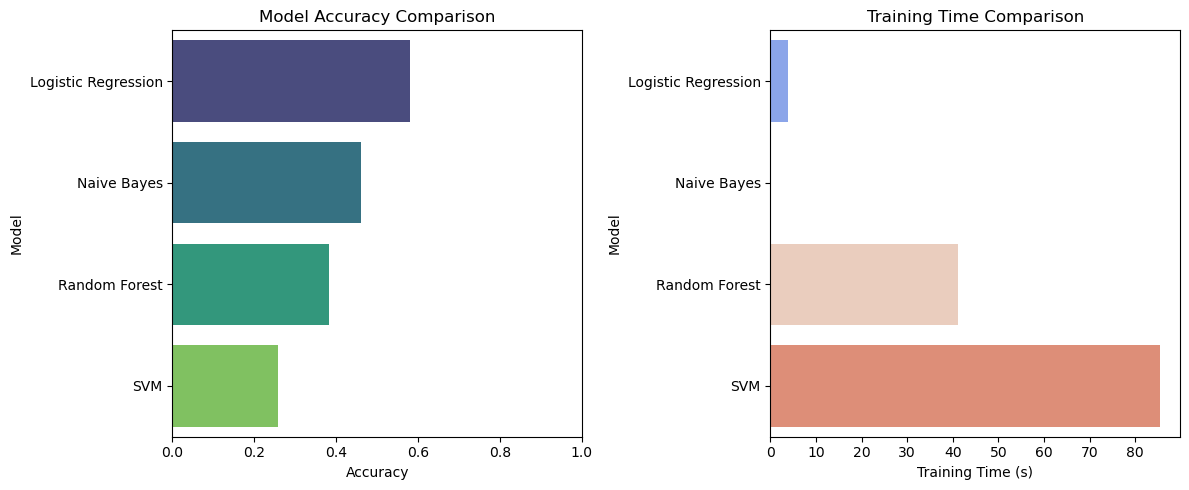


=== DETAILED ANALYSIS FOR BEST MODEL: LOGISTIC REGRESSION ===
                    precision    recall  f1-score   support

Extremely Negative       0.70      0.49      0.58      1096
Extremely Positive       0.69      0.52      0.59      1325
          Negative       0.52      0.53      0.53      1983
           Neutral       0.62      0.70      0.66      1543
          Positive       0.52      0.61      0.56      2285

          accuracy                           0.58      8232
         macro avg       0.61      0.57      0.58      8232
      weighted avg       0.59      0.58      0.58      8232



In [10]:
# Compare model performances
print("\n" + "=" * 60)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 60)

comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [results['accuracy'] for results in model_results.values()],
    'Training Time (s)': [results['training_time'] for results in model_results.values()]
}).sort_values('Accuracy', ascending=False)

print(comparison_df)

# Visual comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=comparison_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(data=comparison_df, x='Training Time (s)', y='Model', palette='coolwarm')
plt.title('Training Time Comparison')

plt.tight_layout()
plt.show()

# Detailed classification report for the best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = model_results[best_model_name]['model']
best_predictions = model_results[best_model_name]['predictions']

print(f"\n=== DETAILED ANALYSIS FOR BEST MODEL: {best_model_name.upper()} ===")
print(classification_report(y_test, best_predictions, target_names=label_encoder.classes_))

#### Step 3.3: Building a Neural Network from Scratch


NEURAL NETWORK FROM SCRATCH (C)
Training neural network from scratch...
Epoch 0, Loss: 1.6098
Epoch 100, Loss: 1.5442
Epoch 200, Loss: 1.4355
Epoch 300, Loss: 1.4018
Epoch 400, Loss: 1.3893


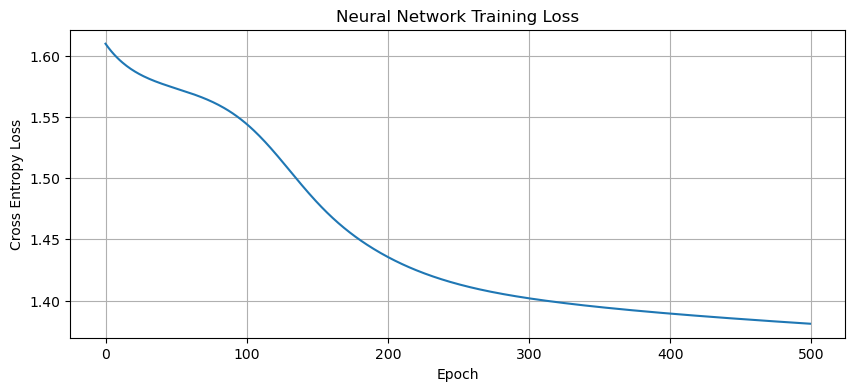


Neural Network from Scratch Accuracy: 0.3863


In [11]:
import numpy as np

class SimpleNeuralNetwork:
    """
    Neural network from scratch (C) demonstrating core concepts
    """
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights and biases - Matrixvermenigvuldigen (T) foundation
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        
    def softmax(self, z):
        """Softmax (T) activation for output layer"""
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def relu(self, z):
        """ReLU activation function (T)"""
        return np.maximum(0, z)
    
    def relu_derivative(self, z):
        """Derivative of ReLU for backpropagation"""
        return (z > 0).astype(float)
    
    def forward(self, X):
        """Forward propagation"""
        # Layer 1
        self.z1 = np.dot(X, self.W1) + self.b1  # Matrixvermenigvuldigen (T)
        self.a1 = self.relu(self.z1)  # Activatiefuncties (T)
        
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2  # Matrixvermenigvuldigen (T)
        self.a2 = self.softmax(self.z2)  # Softmax (T)
        
        return self.a2
    
    def compute_loss(self, y, y_hat):
        """Cross Entropy (T) loss calculation"""
        m = y.shape[0]
        # Avoid log(0) issues
        y_hat = np.clip(y_hat, 1e-12, 1. - 1e-12)
        # Cross entropy loss
        loss = -np.sum(y * np.log(y_hat)) / m
        return loss
    
    def backward(self, X, y, y_hat):
        """Backpropagation (T) with Partial differentieren (T)"""
        m = X.shape[0]
        
        # Output layer gradients
        dz2 = y_hat - y  # Partial differentieren (T)
        dW2 = np.dot(self.a1.T, dz2) / m  # Matrixvermenigvuldigen (T)
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients
        dz1 = np.dot(dz2, self.W2.T) * self.relu_derivative(self.z1)  # Chain rule
        dW1 = np.dot(X.T, dz1) / m  # Matrixvermenigvuldigen (T)
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        return dW1, db1, dW2, db2
    
    def update_parameters(self, dW1, db1, dW2, db2):
        """Gradient descent (A) parameter update"""
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
    
    def train(self, X, y, epochs=1000, verbose=True):
        """Training loop with Gradient descent (A)"""
        # Convert y to one-hot encoding
        y_onehot = np.eye(self.W2.shape[1])[y]
        
        losses = []
        for epoch in range(epochs):
            # Forward pass
            y_hat = self.forward(X)
            
            # Compute loss
            loss = self.compute_loss(y_onehot, y_hat)
            losses.append(loss)
            
            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X, y_onehot, y_hat)
            
            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2)
            
            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        return losses
    
    def predict(self, X):
        """Make predictions"""
        probabilities = self.forward(X)
        return np.argmax(probabilities, axis=1)

# Convert sparse matrices to dense for our neural network
X_train_nn = X_train_dense
X_test_nn = X_test_dense

# Initialize and train our neural network
print("\n" + "=" * 60)
print("NEURAL NETWORK FROM SCRATCH (C)")
print("=" * 60)

input_size = X_train_nn.shape[1]
hidden_size = 64
output_size = len(np.unique(y_train))

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.1)

print("Training neural network from scratch...")
losses = nn.train(X_train_nn, y_train_dense, epochs=500, verbose=True)

# Plot training loss
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.title('Neural Network Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.grid(True)
plt.show()

# Evaluate neural network
nn_predictions = nn.predict(X_test_nn)
nn_accuracy = accuracy_score(y_test_dense, nn_predictions)

print(f"\nNeural Network from Scratch Accuracy: {nn_accuracy:.4f}")

# Add to model comparison
model_results['Neural Network Scratch'] = {
    'model': nn,
    'accuracy': nn_accuracy,
    'predictions': nn_predictions,
    'training_time': None
}

 This neural network implementation demonstrates:

    Neural network from scratch (C) - Complete custom implementation

    Matrixvermenigvuldigen (T) in forward and backward passes

    Differentieren (T) and Partieel differentieren (T) in backpropagation

    Gradient descent (A) optimization

    Backpropagation (T) algorithm

    Activatiefuncties (T) - ReLU and Softmax

    Cross Entropy (T) loss function

    Softmax (T) for multi-class classification

### Phase 4: Model Evaluation & Improvement
#### Step 4.1: Cross-Validation for Robust Evaluation python

CROSS-VALIDATION PERFORMANCE ASSESSMENT
Logistic Regression:
  CV Accuracy: 0.5608 (+/- 0.0112)
  Individual Fold Scores: [0.56264237 0.57023538 0.5579347  0.55337889 0.55990888]
Naive Bayes:
  CV Accuracy: 0.4602 (+/- 0.0092)
  Individual Fold Scores: [0.46393318 0.45983295 0.45223994 0.45937737 0.46545178]
SVM:
  CV Accuracy: 0.3392 (+/- 0.0072)
  Individual Fold Scores: [0.33667426 0.33545938 0.34457099 0.33697798 0.34244495]
Random Forest:
  CV Accuracy: 0.4034 (+/- 0.0117)
  Individual Fold Scores: [0.41017464 0.40926348 0.40379651 0.39878512 0.39514047]


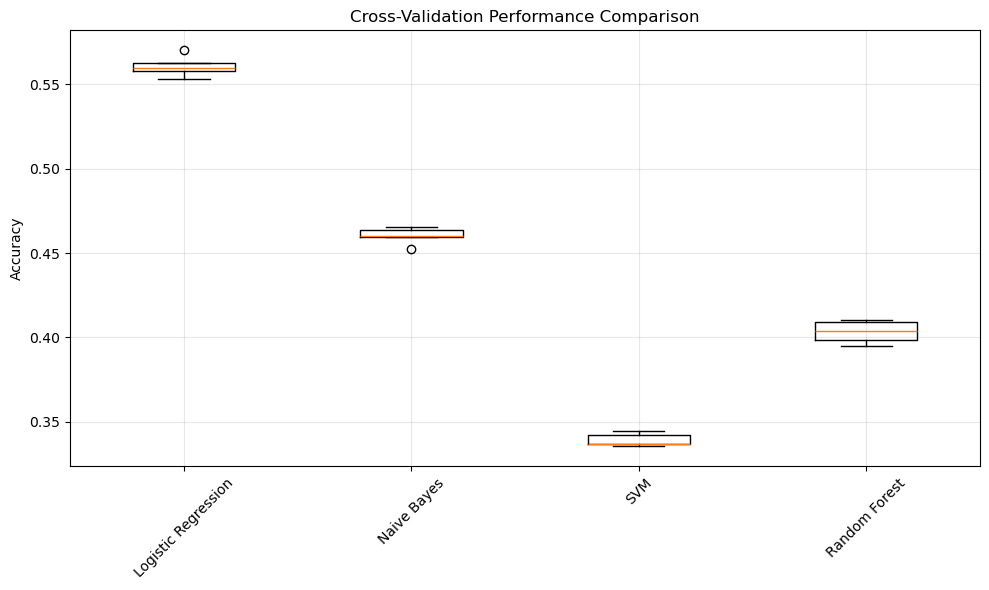

In [15]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import VotingClassifier, BaggingClassifier
import numpy as np

# Cross validation (T) for more reliable performance estimation
print("=" * 60)
print("CROSS-VALIDATION PERFORMANCE ASSESSMENT")
print("=" * 60)

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate all traditional models with cross-validation
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

cv_results = {}
for name, model in models.items():
    if name == 'SVM' or name == 'Random Forest':
        X_cv = X_train_dense
        y_cv = y_train_dense
    else:
        X_cv = X_train
        y_cv = y_train
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_cv, y_cv, cv=cv, scoring='accuracy', n_jobs=-1)
    cv_results[name] = cv_scores
    
    print(f"{name}:")
    print(f"  CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Individual Fold Scores: {cv_scores}")

# Visualize cross-validation results
plt.figure(figsize=(10, 6))
boxplot_data = [scores for scores in cv_results.values()]
plt.boxplot(boxplot_data, labels=cv_results.keys())
plt.title('Cross-Validation Performance Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()